In [7]:
%%capture
%run lab1_PGM_image_analysis.ipynb

In [8]:
from matplotlib import pyplot as plt
import numpy as np

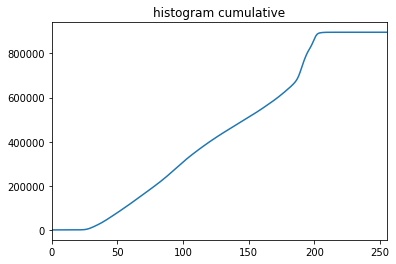

In [9]:
histogram_cumultative = histogram_cummulative(image);

In [10]:
def normalize_histogram(image, show=True):
    height, width = image.shape
    nb_pixels = height * width
    hn = histogram_cumultative / nb_pixels * 255
    if(show):
        plt.xlim([0,255])
        plt.plot(hn)
        plt.title('histogram normalized')
        plt.show()
    return hn

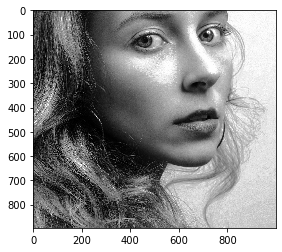

In [11]:
def equalize_histogram(image, show=True):
    histogram_normalized = normalize_histogram(image, show=False)
    eq_image = np.empty(image.shape, dtype=float)
    height, width = image.shape
    for row in range(0,height):
        for col in range(0,width):
            eq_image[row,col] = int(histogram_normalized[int(image[row,col])])
    return eq_image
image_equalized = equalize_histogram(image);
plt.imshow(image_equalized, interpolation='nearest',cmap='gray')
plt.show()

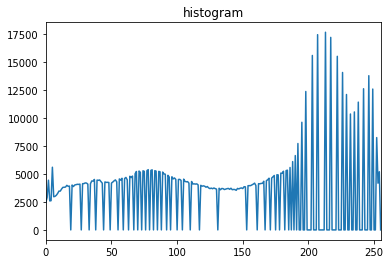

In [12]:
histogram_equalized = histogram(image_equalized);

## Contrast enhancement:

It is defined as the manipulation and redistributing the image pixels in a linear or non-linear fashion to improve the separation of obscured structural variations in pixel intensity into a more visually differentiable structural distribution.


### Linear contrast enhancement:

The linear transformation function is simplest way of image manipulation and it can be written as:

            y_i = f (x_i) = a * x_i + b

plot_linear_transformation is a function that takes two points as an input, verifies that they don't have the same x value, then plots the graph of this linear transformation.

apply_linear_transformation is the function that applies the previous linear transformation on a picture.

In [13]:
def plot_linear_transformation(p1,p2):
    assert(p1[0] != 0)
    assert(p1[0] != p2[0])
    assert(p2[0] != 255)
    plt.plot([0, p1[0], p2[0], 255], [0, p1[1], p2[1], 255], 'r', linewidth=4)
    plt.plot([0,255], [0, 255], 'k:')

In [21]:
def apply_linear_transformation(image,p1,p2):
    image_enhanced = np.empty(image.shape, dtype=float)
    height, width = image.shape
    b2 = (p2[0] * p1[1] - p1[0] * p2[1]) / (p2[0] - p1[0])
    b3 = (255 * p2[1] - 255 * p2[0]) / (255 - p2[0])
    for row in range(0,height):
        for col in range(0,width):
            if (image[row,col] <p1[0]):
                image_enhanced[row,col] = (p1[1]/p1[0]) * image[row,col]
            elif (image[row,col] <p2[0]):
                image_enhanced[row,col] = ( ((p2[1] - p1[1])/ (p2[0] - p1[0])) * image[row,col] )+b2
            else:
                image_enhanced[row,col] = ( ((255 - p2[1])/ (255- p2[0])) * image[row,col] ) + b3
    return image_enhanced

#### Contrast stretching
As our first example, we chose:
- the first point: 
    - x_value = the minimum gray-level value in our image
    - y_value = 0

- the second point:
    - x_value = the maximum gray-level value in our image
    - y_value = 255
        
This allows as to stretch the interesting part of our image (where we have different gray-level values), which enhances the contrast.

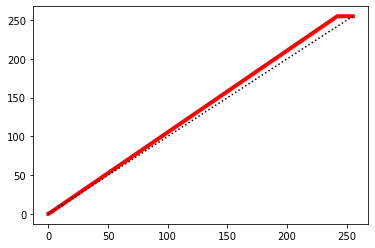

In [50]:
min_gray_value = image.min()
max_gray_value = image.max()
p1 = [min_gray_value if min_gray_value != 0 else 0.001,0]
p2 = [max_gray_value if max_gray_value != 255 else 254.999,255]
plot_linear_transformation(p1,p2)

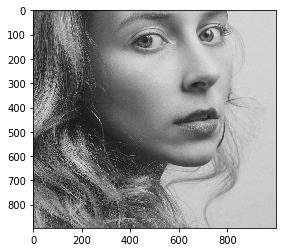

In [51]:
image_enhanced = apply_linear_transformation(image,p1,p2);
plt.imshow(image_enhanced, interpolation='nearest',cmap='gray')
plt.show()

#### Contrast stretching with saturation

Following the same principle as the example above, this time we chose:
  - the first point: 
      - x_value > the minimum gray-level value in our image
      - y_value = 0

  - the second point:
      - x_value < the maximum gray-level value in our image
      - y_value = 255

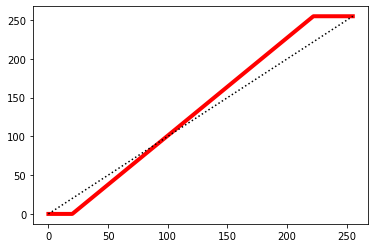

In [52]:
assert(255 - min_gray_value > 20)
assert(max_gray_value > 20)
assert(min_gray_value + 20 < max_gray_value - 20)
p1 = [min_gray_value + 20 ,0]
p2 = [max_gray_value - 20 ,255]
plot_linear_transformation(p1,p2)

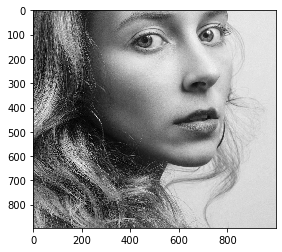

In [53]:
image_enhanced = apply_linear_transformation(image,p1,p2);
plt.imshow(image_enhanced, interpolation='nearest',cmap='gray')
plt.show()

#### Piecewise linear transformation
    White zones stretching: (dilatation des zones claires)
This linear transformation makes the image darker.

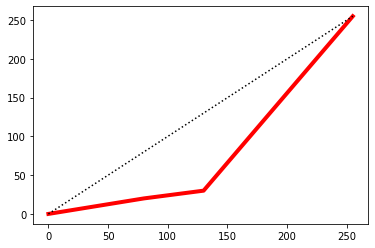

In [27]:
p1 = [80,20]
p2 = [130,30]
plot_linear_transformation(p1,p2)

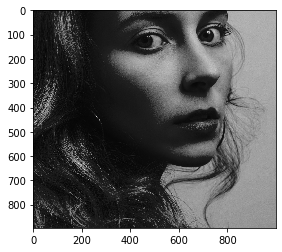

In [28]:
image_enhanced = apply_linear_transformation(image,p1,p2);
plt.imshow(image_enhanced, interpolation='nearest',cmap='gray')
plt.show()

    Dark zones stretching: (dilatation des zones sombres)
This linear transformation makes the image brighter.

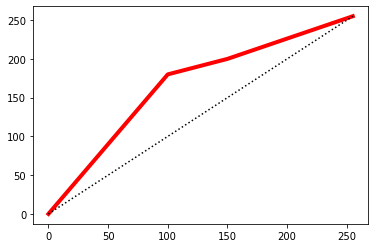

In [33]:
p1 = [100,180]
p2 = [150,200]
plot_linear_transformation(p1,p2)

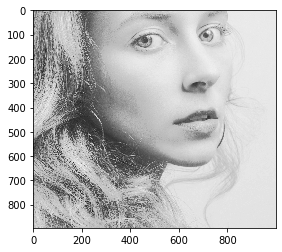

In [34]:
image_enhanced = apply_linear_transformation(image,p1,p2);
plt.imshow(image_enhanced, interpolation='nearest',cmap='gray')
plt.show()

    Middle zones stretching: (dilatation de la zone du milieu)
This linear transformation makes the bright parts of the image even brighter and the dark parts of the image even darker.
This enhance the contrast very well.

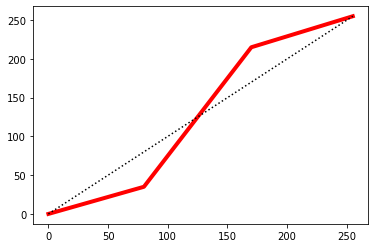

In [43]:
p1 = [80,35]
p2 = [170,215]
plot_linear_transformation(p1,p2)

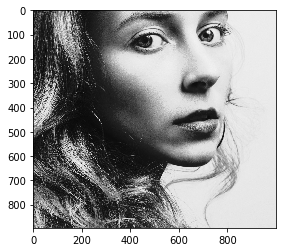

In [44]:
image_enhanced = apply_linear_transformation(image,p1,p2);
plt.imshow(image_enhanced, interpolation='nearest',cmap='gray')
plt.show()